### 1. Project Initialization
#### 1.1 Import Dependencies
- Load libraries (pandas, numpy, scikit-learn, matplotlib)
- Ensure reproducibility with random seeds
- Import ML modules

#### 1.2 Configuration Setup
- Define global variables, constants
- Set hyperparameters
- Configure visualization settings
- Set up file paths

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import seaborn as sns


### 2. Data Management
#### 2.1 Data Loading
- Load dataset from CSV/API/DB
- Handle file formats
- Load into DataFrame

In [2]:
df = pd.read_csv('data.csv')
df.head()

,x,y
0,1.409445,5.275026
1,-9.337377,212.625146
2,-6.951291,124.721516
3,3.781497,20.279580
4,-5.841269,93.034061



#### 2.2 Data Inspection
- Check shape, data types
- View rows
- Identify missing values

In [3]:
df.shape

(1000, 2)

In [4]:
df.dtypes

x    float64
y    float64
dtype: object

In [5]:
df.head()

,x,y
0,1.409445,5.275026
1,-9.337377,212.625146
2,-6.951291,124.721516
3,3.781497,20.279580
4,-5.841269,93.034061


In [6]:
df.isna().sum()

x    0
y    0
dtype: int64

#### 2.3 Data Quality Assessment
- Detect outliers, duplicates
- Validate consistency
- Assess completeness

In [7]:
df.duplicated().sum()

np.int64(0)

<Axes: ylabel='y'>

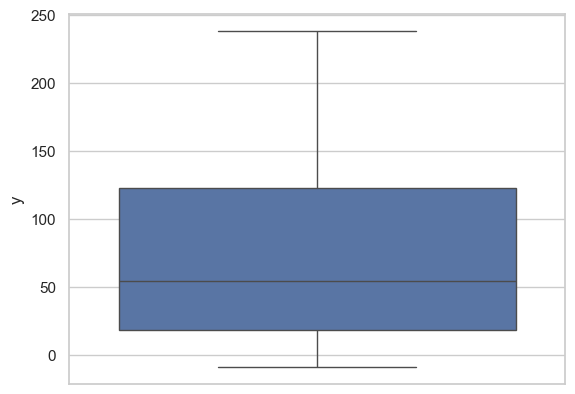

In [11]:
sns.set(style='whitegrid')
sns.boxplot(df['y'])

<Axes: xlabel='y', ylabel='Count'>

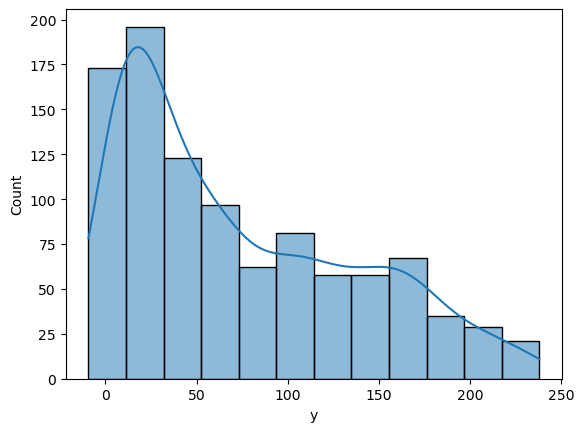

In [10]:
sns.histplot(df['y'], kde=True)

### 3. Exploratory Data Analysis
#### 3.1 Statistical Summary
- Descriptive statistics
- Correlations
- Distribution analysis
- Skewness identification

#### 3.2 Visualization & Insights
- Scatter, histograms, boxplots
- Identify patterns/trends
- Generate insights

#### 3.3 Feature-Target Relationship
- Analyze correlation
- Identify influential features
- Select relevant features

In [12]:
df.describe()

,x,y
count,1000.000000,1000.000000
mean,-0.027201,73.613661
std,5.850491,63.767035
min,-9.988547,-9.299270
25%,-5.061974,18.132173
50%,-0.135796,54.387525
75%,4.987739,122.281817
max,9.991836,237.950299


<Axes: >

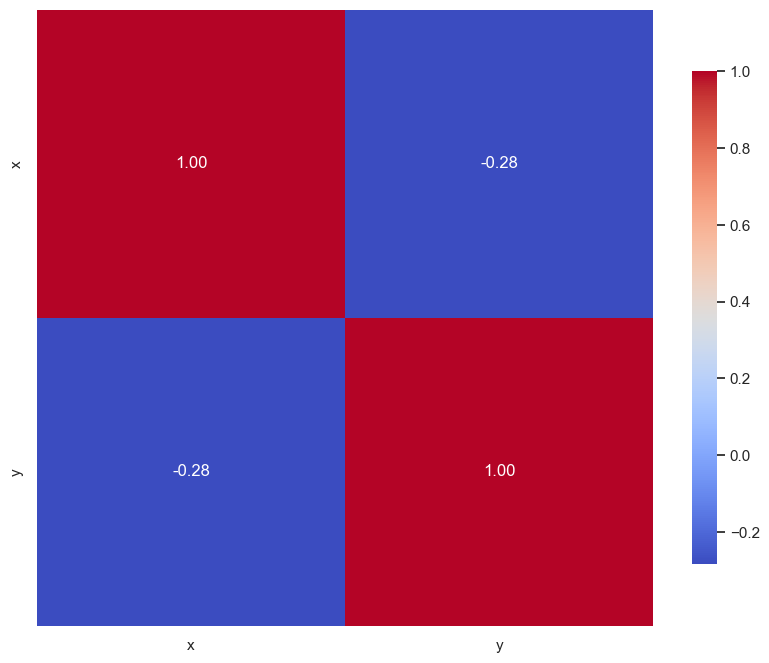

In [13]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8}) 

<Axes: ylabel='y'>

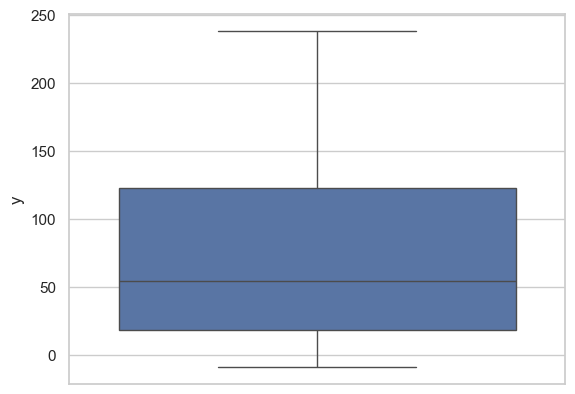

In [14]:
sns.set(style='whitegrid')
sns.boxplot(df['y'])

<Axes: xlabel='y', ylabel='Count'>

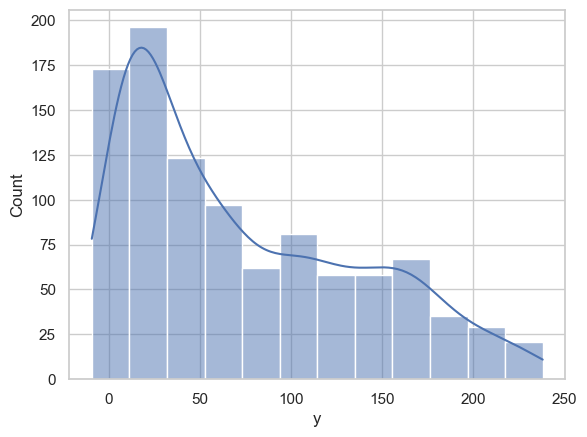

In [15]:
sns.histplot(df['y'], kde=True)

### 4. Data Preprocessing
#### 4.1 Data Splitting Strategy
- Train-test split
- Cross-validation
- Stratification
- Maintain distribution
#### 4.2 Feature Engineering
- New feature creation
- Encoding categorical variables
- Transform features
- Select important features

#### 4.3 Data Transformation
- Scale/normalize
- Handle missing values
- Transform skewed data
- Prepare for model input

In [28]:
X = df['x']
y = df['y']
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train.values.reshape(-1, 1))
X_test = scalar.transform(X_test.values.reshape(-1, 1))

In [30]:
#Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
scores = cross_val_score(model, X_train,
                         y_train, cv=cv, 
                         scoring='neg_mean_squared_error')
mean_mse = -scores.mean()
print(f'Mean MSE from cross-validation: {mean_mse:.2f}')


Mean MSE from cross-validation: 22.23


### 5. Model Implementation
#### 5.1 Model Selection
- Choose algorithm (Linear Regression)
- Compare options
- Consider complexity
- Select best model

#### 5.2 Training Procedure
- Initialize model
- Fit training data
- Monitor training
- Handle optimization

#### 5.3 Model Persistence
- Save model file
- Store preprocessors
- Serialize pipeline
- Enable deployment


In [33]:
best_model = model
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 26.22
R^2 Score: 0.99


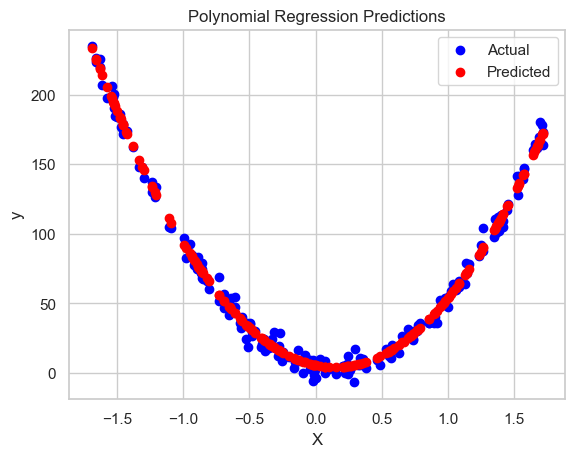

In [34]:
plt.Figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Polynomial Regression Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### 6. Inference & Evaluation
#### 6.1 Prediction Pipeline
- Predict on test data
- Preprocess new data
- Handle probabilities
- Build workflow

#### 6.2 Metric Calculation
- Compute MSE, R², MAE
- Train vs test performance
- Reports
- Assess errors

#### 6.3 Performance Benchmarking
- Compare baseline
- Business objectives
- Computational efficiency
- Industry benchmarks

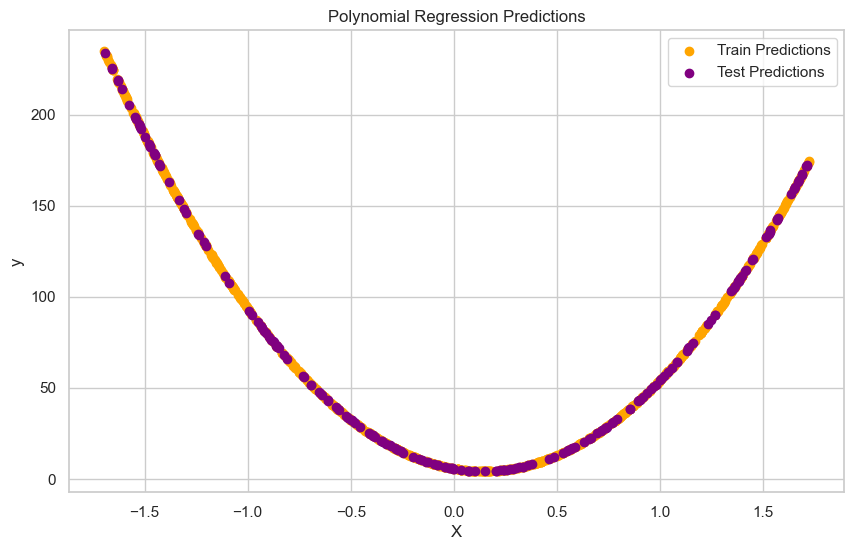

In [37]:
Train = model.predict(X_train)
Test = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Train, color='orange', label='Train Predictions')
plt.scatter(X_test, Test, color='purple', label='Test Predictions')
plt.title('Polynomial Regression Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


Train R^2 Score: 0.99
Test R^2 Score: 0.99


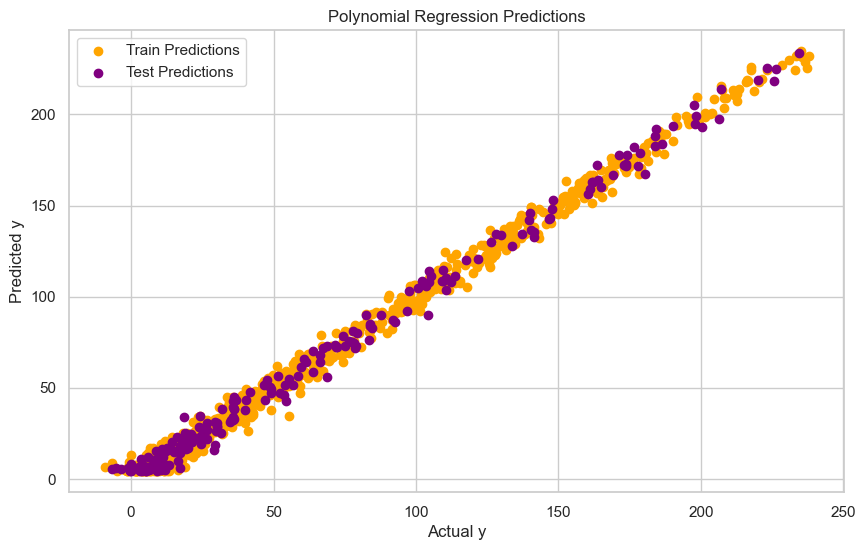

In [38]:
train_r2 = r2_score(y_train, Train)
test_r2 = r2_score(y_test, Test)
print(f'Train R^2 Score: {train_r2:.2f}')
print(f'Test R^2 Score: {test_r2:.2f}')
plt.figure(figsize=(10, 6))
plt.scatter(y_train, Train, color='orange', label='Train Predictions')
plt.scatter(y_test, Test, color='purple', label='Test Predictions')
plt.title('Polynomial Regression Predictions')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.legend()
plt.show()


### 7. Validation & Documentation
#### 7.1 Model Validation
- Cross-validation
- Holdout testing
- Validate assumptions
- Ensure robustness

#### 7.2 Results Interpretation
- Explain coefficients
- Error analysis
- Business insights
- Identify improvements

#### 7.3 Project Documentation
- Document workflow
- Maintain reproducibility
- Provide references